In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

df = pd.read_parquet("../data_clean/crimes_featured.parquet")

df.head()

,ID,case_number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Hour,DayOfWeek,Month_Name,Quarter,Is_Weekend,Time_Of_Day,Has_Coordinates,Is_Domestic,Crime_Category,Arrest_Flag
0,14015267,JJ472734,2025-10-31,054XX S KEDZIE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESTAURANT,True,True,...,0,Friday,October,4,False,Night,True,1,Violent Crime,1
1,14018155,JJ476333,2025-10-31,071XX S SAWYER AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,0,Friday,October,4,False,Night,True,0,Other Crime,0
2,14017696,JJ475588,2025-10-31,060XX N KENMORE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,APARTMENT,False,False,...,0,Friday,October,4,False,Night,True,0,Other Crime,0
3,14015980,JJ473563,2025-10-31,026XX W CATALPA AVE,560,ASSAULT,SIMPLE,STREET,False,False,...,0,Friday,October,4,False,Night,True,0,Violent Crime,0
4,14019363,JJ477308,2025-10-31,031XX S LOWE AVE,810,THEFT,OVER $500,STREET,False,False,...,0,Friday,October,4,False,Night,True,0,Property Crime,0


In [2]:
df_ts = df.copy()
df_ts["Date"] = pd.to_datetime(df_ts["Date"])
df_ts = df_ts.set_index("Date")

df_ts.head()

,ID,case_number,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,...,Hour,DayOfWeek,Month_Name,Quarter,Is_Weekend,Time_Of_Day,Has_Coordinates,Is_Domestic,Crime_Category,Arrest_Flag
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-31,14015267,JJ472734,054XX S KEDZIE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESTAURANT,True,True,822,...,0,Friday,October,4,False,Night,True,1,Violent Crime,1
2025-10-31,14018155,JJ476333,071XX S SAWYER AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,...,0,Friday,October,4,False,Night,True,0,Other Crime,0
2025-10-31,14017696,JJ475588,060XX N KENMORE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,APARTMENT,False,False,2433,...,0,Friday,October,4,False,Night,True,0,Other Crime,0
2025-10-31,14015980,JJ473563,026XX W CATALPA AVE,560,ASSAULT,SIMPLE,STREET,False,False,2011,...,0,Friday,October,4,False,Night,True,0,Violent Crime,0
2025-10-31,14019363,JJ477308,031XX S LOWE AVE,810,THEFT,OVER $500,STREET,False,False,915,...,0,Friday,October,4,False,Night,True,0,Property Crime,0


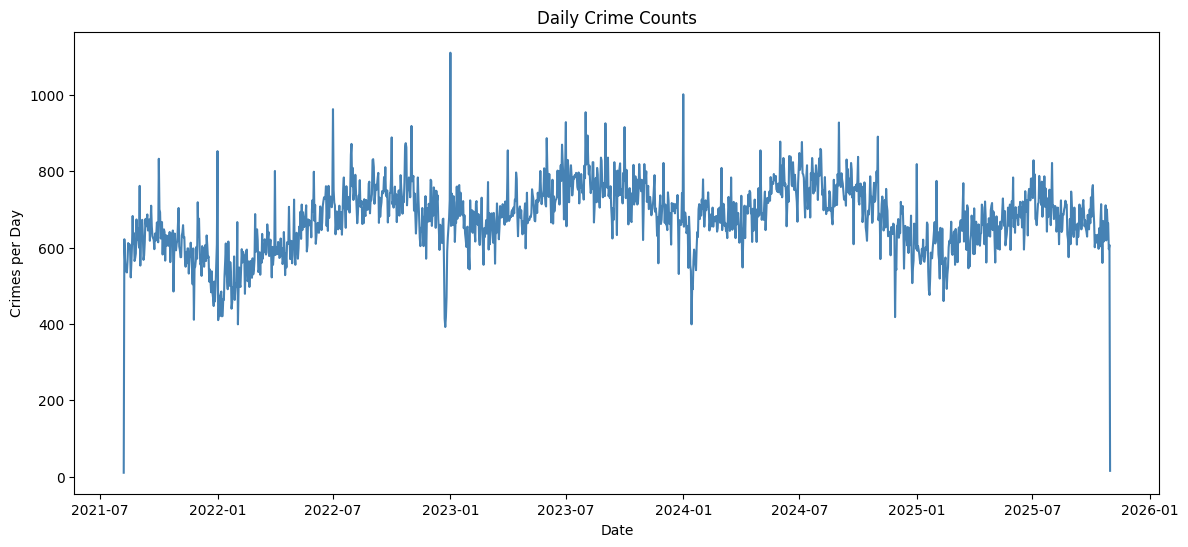

In [3]:
daily = df_ts.resample("D")["ID"].count()

plt.figure(figsize=(14,6))
plt.plot(daily, color="steelblue")
plt.title("Daily Crime Counts")
plt.xlabel("Date")
plt.ylabel("Crimes per Day")
plt.show()

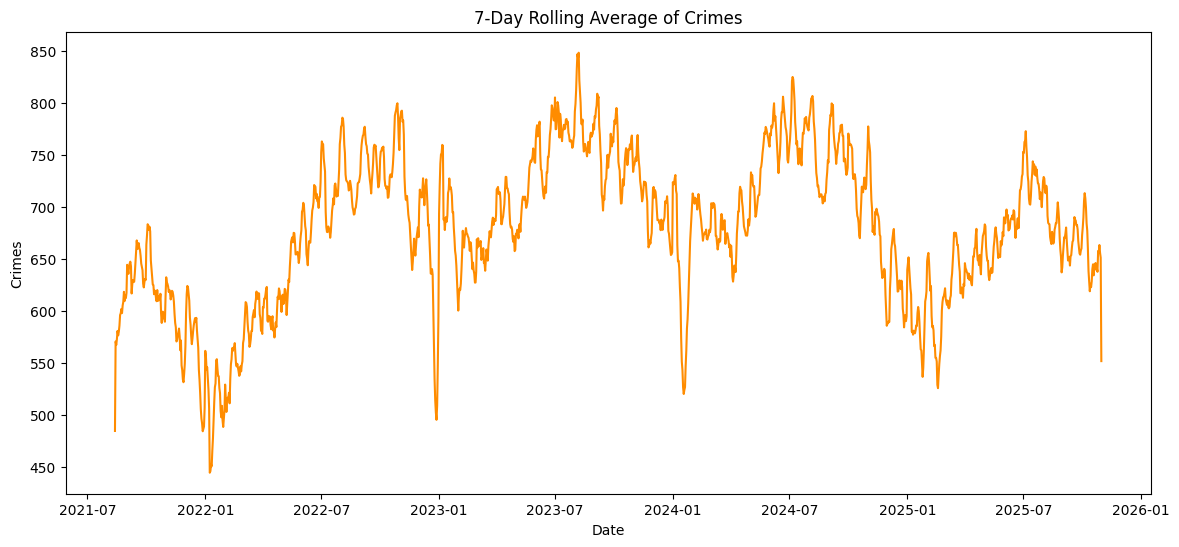

In [4]:
plt.figure(figsize=(14,6))
plt.plot(daily.rolling(7).mean(), color="darkorange")
plt.title("7-Day Rolling Average of Crimes")
plt.xlabel("Date")
plt.ylabel("Crimes")
plt.show()

C:\Users\darsh\AppData\Local\Temp\ipykernel_23268\488082097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_ts.resample("M")["ID"].count()


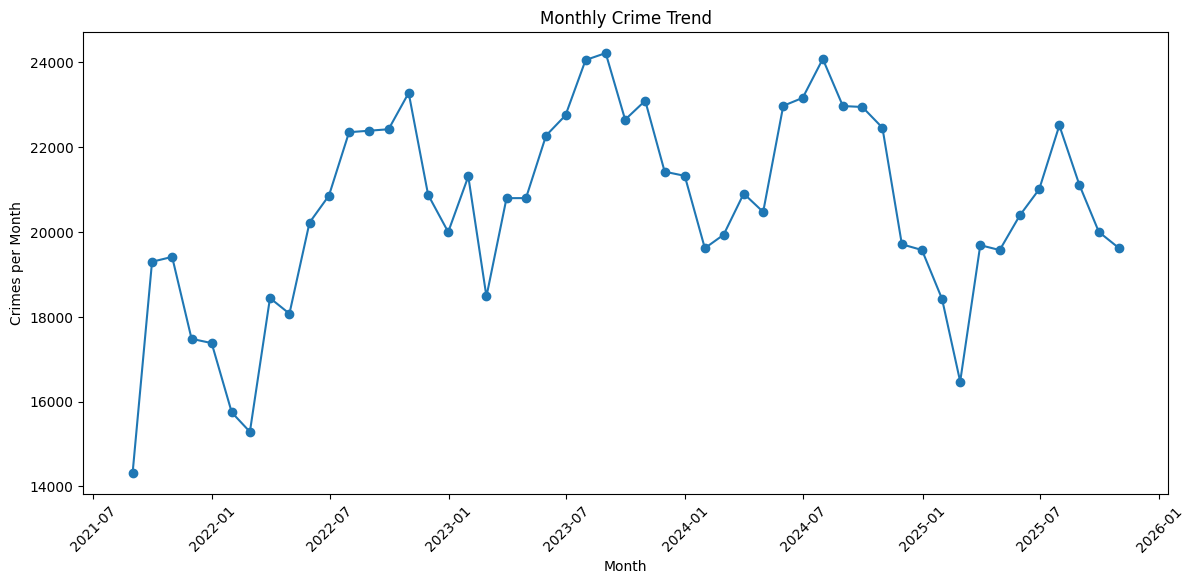

In [5]:
monthly = df_ts.resample("M")["ID"].count()

plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly.values, marker="o")
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Crimes per Month")
plt.xticks(rotation=45)
plt.show()

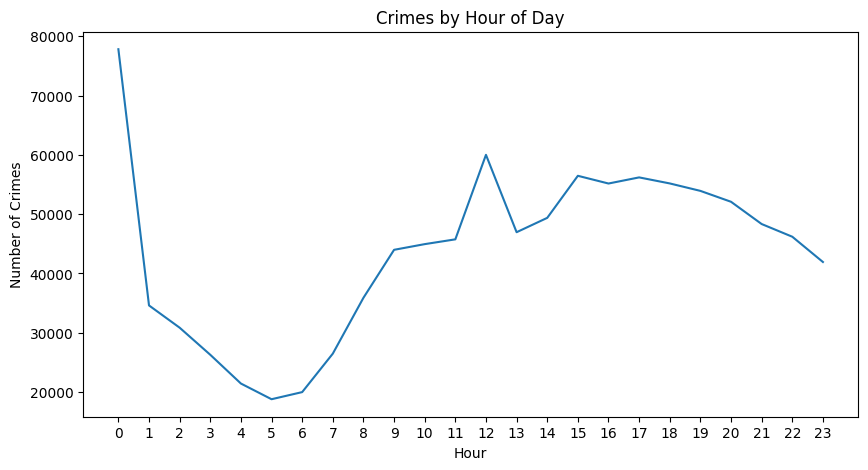

In [6]:
hourly = df.groupby("Hour")["ID"].count()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly.values)
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.show()

C:\Users\darsh\AppData\Local\Temp\ipykernel_23268\1676943534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow.index, y=dow.values, palette="viridis")


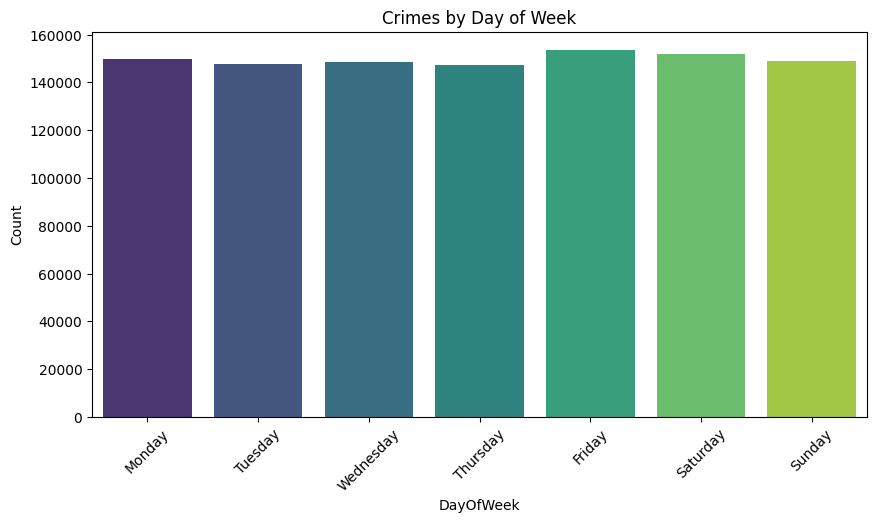

In [7]:
dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

dow = df["DayOfWeek"].value_counts().reindex(dow_order)

plt.figure(figsize=(10,5))
sns.barplot(x=dow.index, y=dow.values, palette="viridis")
plt.title("Crimes by Day of Week")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

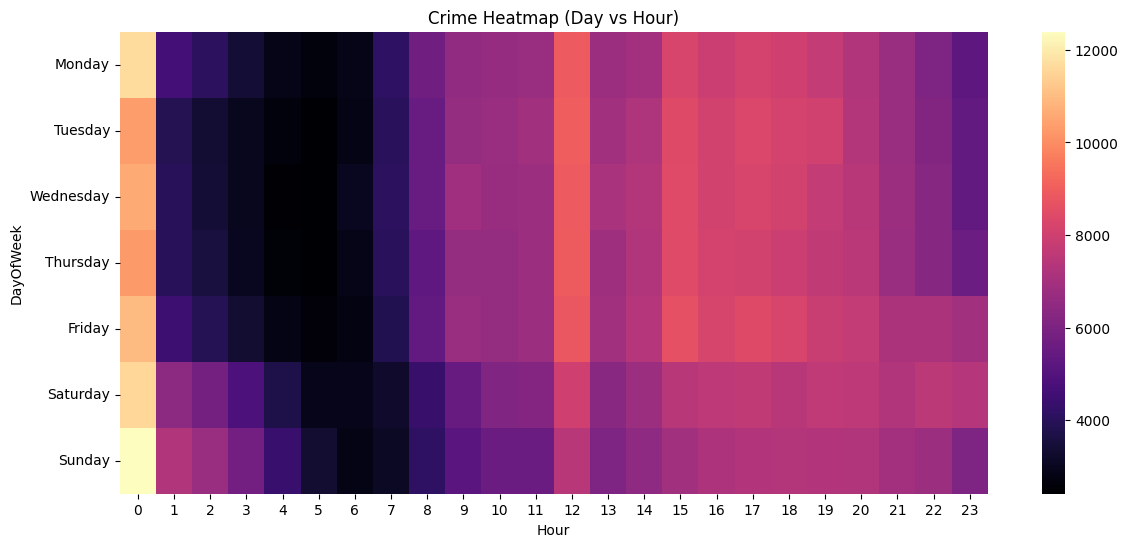

In [8]:
pivot = df.pivot_table(index="DayOfWeek", columns="Hour", values="ID", aggfunc="count")
pivot = pivot.reindex(dow_order)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="magma")
plt.title("Crime Heatmap (Day vs Hour)")
plt.show()

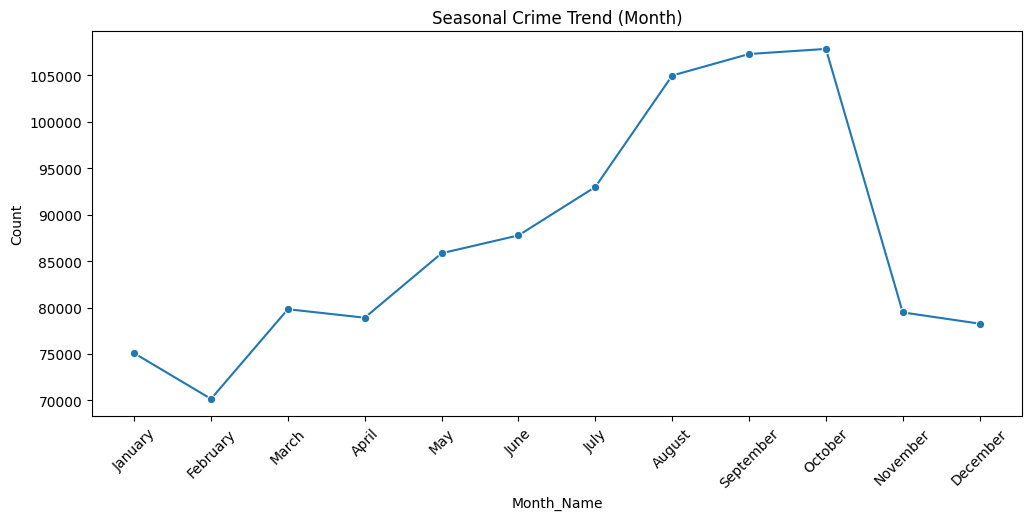

In [9]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

monthly2 = df["Month_Name"].value_counts().reindex(month_order)

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly2.index, y=monthly2.values, marker="o")
plt.title("Seasonal Crime Trend (Month)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

C:\Users\darsh\AppData\Local\Temp\ipykernel_23268\2661125918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly.index, y=yearly.values, palette="coolwarm")


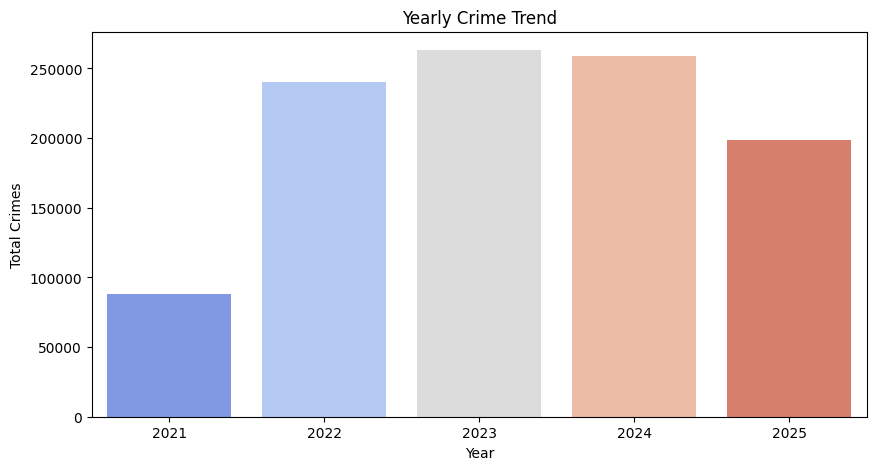

In [10]:
yearly = df.groupby("Year")["ID"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=yearly.index, y=yearly.values, palette="coolwarm")
plt.title("Yearly Crime Trend")
plt.ylabel("Total Crimes")
plt.show()

In [12]:
%pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------- ----------------- 6.8/12.1 MB 38.3 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 35.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 29.2 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ------ --------------------------------- 1/6 [stanio]
   ------------- -------------------------- 2/6 [importlib_resources]
   ------------- -------------------------- 2/6 [importlib_resources]
   ------------- -------------------------- 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\darsh\Downloads\DAPROJECTS\Chicago_Crimes\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

01:33:44 - cmdstanpy - INFO - Chain [1] start processing
01:33:45 - cmdstanpy - INFO - Chain [1] done processing


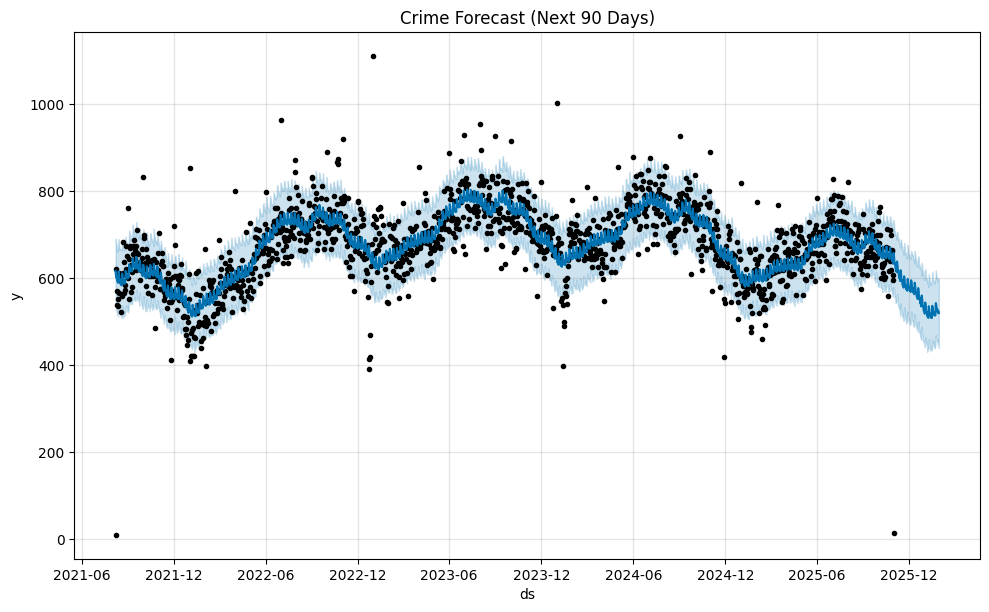

In [13]:
from prophet import Prophet

prophet_df = daily.reset_index()
prophet_df.columns = ["ds", "y"]

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Crime Forecast (Next 90 Days)")
plt.show()